In [21]:
import random
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.image import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import regularizers

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
labels= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 [==============================] - 4s 0us/step


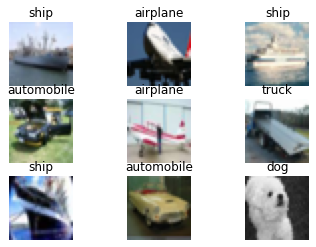

In [20]:
plt.subplots(3, 3)
for i in range(9):
  idx = random.randint(0, len(x_train))

  label = y_train[idx][0]


  image=x_train[idx]
  plt.subplot(3,3,i+1)
  plt.imshow(image)
  plt.title(labels[label], rotation=0, size='large')
  plt.axis('off')



In [22]:
# Model configuration
batch_size = 64
img_width, img_height, img_num_channels = 32, 32, 3
input_shape = (img_width, img_height, img_num_channels)
loss_function = categorical_crossentropy # For one-hot vector labels

no_classes = 10
no_epochs = 256
lr=0.01
optimizer = SGD(learning_rate=lr)
validation_split = 0.2
verbosity = 1


In [23]:
# One-hot vector
enc = OneHotEncoder(sparse=False)
y_train_onehot = enc.fit_transform(y_train)
y_test_onehot = enc.fit_transform(y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
# Parse numbers as floats
input_train = x_train.astype('float32')

# Scale data
input_train = input_train / 255

In [25]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(lr), bias_regularizer=regularizers.l2(lr)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(lr), bias_regularizer=regularizers.l2(lr)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(no_classes, activation='softmax'))

In [26]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [27]:
history = model.fit(input_train, y_train_onehot,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/256
625/625 [==============================] - 18s 11ms/step - loss: 3.0863 - accuracy: 0.1567 - val_loss: 2.8010 - val_accuracy: 0.2443
Epoch 2/256
625/625 [==============================] - 8s 12ms/step - loss: 2.7261 - accuracy: 0.2361 - val_loss: 2.5599 - val_accuracy: 0.2752
Epoch 3/256
625/625 [==============================] - 7s 11ms/step - loss: 2.5033 - accuracy: 0.2718 - val_loss: 2.3546 - val_accuracy: 0.3186
Epoch 4/256
625/625 [==============================] - 6s 10ms/step - loss: 2.3081 - accuracy: 0.3122 - val_loss: 2.1357 - val_accuracy: 0.3701
Epoch 5/256
625/625 [==============================] - 7s 11ms/step - loss: 2.1243 - accuracy: 0.3523 - val_loss: 1.9480 - val_accuracy: 0.3978
Epoch 6/256
625/625 [==============================] - 6s 9ms/step - loss: 1.9783 - accuracy: 0.3782 - val_loss: 1.8294 - val_accuracy: 0.4237
Epoch 7/256
625/625 [==============================] - 6s 10ms/step - loss: 1.8741 - accuracy: 0.3959 - val_loss: 1.7617 - val_accuracy:

In [28]:
score = model.evaluate(x_test/255, y_test_onehot, verbose=0)
print(f'Test accuracy : {score[1]}')

Test accuracy : 0.8093000054359436


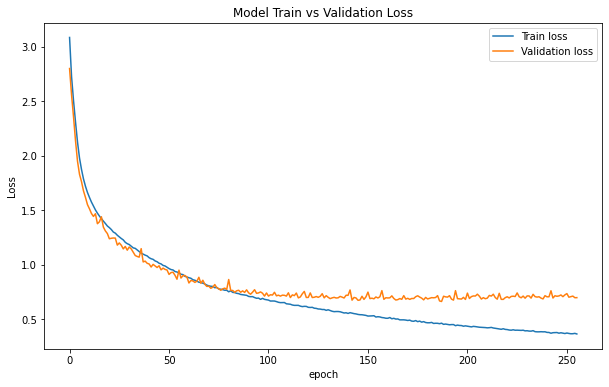

In [29]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')

In [30]:
pred = np.argmax(model.predict(x_test/255),axis=1)
print("Classification reports:")
print(classification_report(y_true= y_test, y_pred=pred, target_names=labels, digits=4))

313/313 [==============================] - 1s 2ms/step
Classification reports for 32x32 images:
              precision    recall  f1-score   support

    airplane     0.8340    0.8340    0.8340      1000
  automobile     0.9106    0.9060    0.9083      1000
        bird     0.8073    0.6660    0.7299      1000
         cat     0.6326    0.6560    0.6441      1000
        deer     0.7633    0.8160    0.7888      1000
         dog     0.6978    0.7550    0.7253      1000
        frog     0.8802    0.8300    0.8543      1000
       horse     0.8420    0.8420    0.8420      1000
        ship     0.8821    0.8900    0.8860      1000
       truck     0.8635    0.8980    0.8804      1000

    accuracy                         0.8093     10000
   macro avg     0.8113    0.8093    0.8093     10000
weighted avg     0.8113    0.8093    0.8093     10000



In [34]:
model.save("./model.h5")